In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense,Conv2D,MaxPooling2D
from keras.layers import Dropout, Flatten
from keras.utils import np_utils
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from skimage import io
from skimage.transform import rescale,resize
from keras.models import load_model
import cv2 

from matplotlib import pyplot as plt



Using TensorFlow backend.


In [2]:
def class_name(arg):
    switcher = {
        0: 'J',
        1: 'K',
        2: 'L',
        3: 'M',
        4: 'N',
        5: 'O',
        6: 'Z',
        7: 'n',
        8: '1',
        9: '2',
        10: '3',
        11: '4',
        12: '5',
        13: '6',
        14: '7',
        15: '8',
        16: '9',
        17: 'A',
        18: 'B',
        19: 'C',
        20: 'D',
        21: 'E',
        22:'F',
        23: 'G',
        24: 'H',
        25: 'i',
        26: 'p',
        27: 'R',
        28: 's',
        29: 'T',
        30: 'u',
        31: 'v',
        32: 'y',
        33: 'a',
        34: 'b',
        35: 'd',
        36: 'e',
        37: 'f',
        38: 'g',
        39: 'h',
        40: 'r',
        41: 't',
    }
    return switcher.get(arg,'')


In [3]:
def rotate_img(img,angle):
    (h, w) = img.shape[:2
                        ]
    # calculate the center of the image
    center = (w / 2, h / 2)

    scale = 1.0

    # Perform the counter clockwise rotation holding at the center
    # 90 degrees
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(img, M, (h, w))
    return rotated

In [4]:
def segment_text(image,kernel):
    
    if kernel is not None:
        gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)
        ret, im_th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
        
        img_dilation = cv2.dilate(im_th, kernel, iterations=1)
        
        ctrs,hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        rects = [cv2.boundingRect(ctr) for ctr in ctrs]
        images = []
        arr = []
        for rect in rects:
            
            cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
            roi = image[int(rect[1]):int(rect[1]+rect[3]),int(rect[0]):int(rect[0]+rect[2])]
            images.append(roi)
        
        return images
    else:
        gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)
        ret, im_th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
        ctrs,hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        rects = [cv2.boundingRect(ctr) for ctr in ctrs]
        images = []
        for rect in rects:
            cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 9) 
            roi = image[int(rect[1]):int(rect[1]+rect[3]),int(rect[0]):int(rect[0]+rect[2])]
            images.append(roi)
        return images
        
    

In [5]:
def predict_character(char_img):
    kernel = np.ones((5,5), np.uint8)
    model = load_model('/home/kubra/Desktop/hndwrte_recog_model.h5')
    opt = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    charachter = []
    gray = cv2.cvtColor(char_img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(gray, (32, 32), interpolation=cv2.INTER_AREA)
    ret, im_th = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    img_dilation = cv2.dilate(im_th, kernel, iterations=1)
    charachter.append(img_dilation)
    x_train = np.array(charachter,dtype=np.float32)
    x_train = x_train.reshape(-1,32, 32, 1)
    result = model.predict_classes(x_train)
    return class_name(result[0])

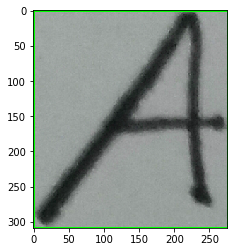

A


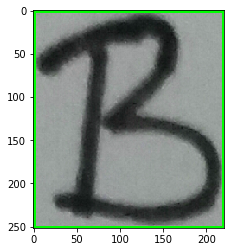

B


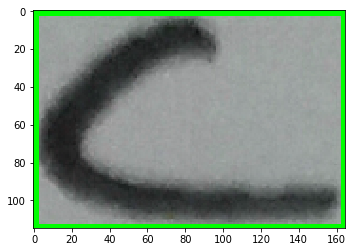

8


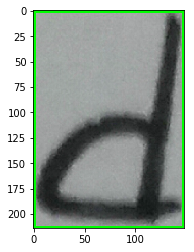

d


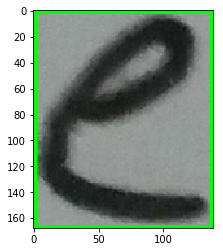

e


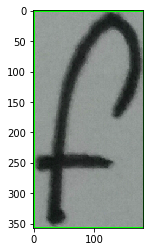

G


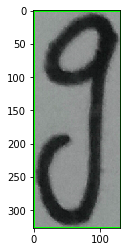

g


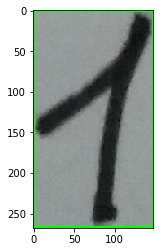

4


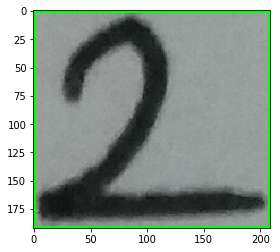

In [ ]:
def main():
    w = ""
    l = ""
    text = ""
    file_name = "text.jpg"
    
    image = cv2.imread(file_name)
    image2 = cv2.imread(file_name)

    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    kernel_lines = np.ones((5,500), np.uint8)
    kernel_words = np.ones((200,5), np.uint8)
    kernel_characters = np.ones((5,5), np.uint8)
    lines = segment_text(image,kernel_lines)
    lines = lines[::-1]
    for line in lines:
        words = []
        transposed_line = cv2.transpose(line)
        words = segment_text(transposed_line,kernel_words)
        words = words[::-1]
        
        for word in words:
            characters = []
        
         #   transposed = cv2.transpose(word)
            characters = segment_text(word,kernel_characters)
                
            characters = characters[::-1]
            
            for character in characters:
                transpose_ch = cv2.transpose(character) 
                plt.imshow(transpose_ch)
                plt.show()
                print(str(predict_character(transpose_ch)))
                
                w = w + str(predict_character(transpose_ch))
            l = l+" "+w
        text = text + "\n" + l
        """
    print(text)

    font = cv2.FONT_HERSHEY_COMPLEX
    result_img = cv2.putText(image2,text,(10,1500), font, 3,(255,0,0),2,cv2.LINE_AA)
    print(text)
    cv2.imshow("result",result_img)
    cv2.waitKey(0)
    """
    
    
main()    